In [17]:
import os
import cv2
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### RGB Distribution Plot using Histograms

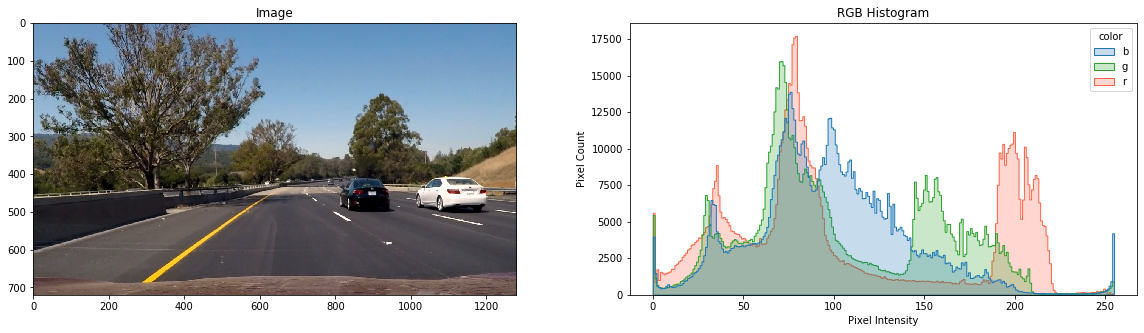

In [2]:
from ImageHistogram import plotRGBDistribution

image = cv2.imread("Image_Database/road.jpg")
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))

ax1.set_title('Image')
ax1.imshow(image)
ax2.set_title('RGB Histogram')
plotRGBDistribution(image, ax2)
plt.show()

### Gray Distribution Plot using Histograms

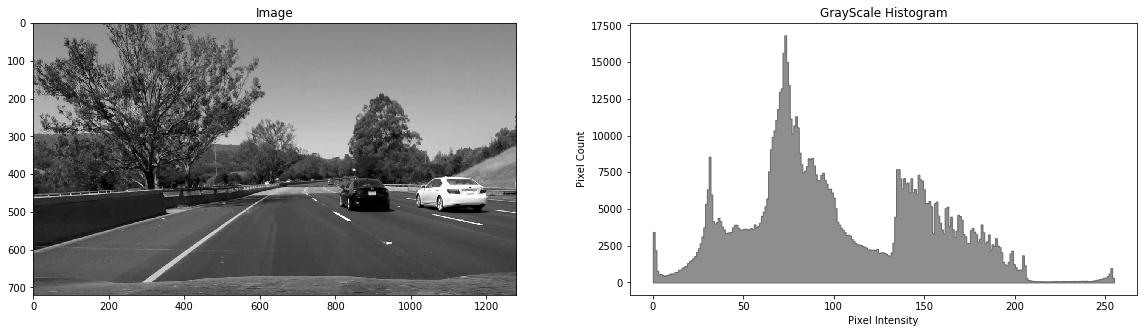

In [6]:
from ImageHistogram import plotGrayDistribution

image = cv2.imread("../Image_Database/road.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))

ax1.set_title('Image')
ax1.imshow(image, cmap="gray")
ax2.set_title('GrayScale Histogram')
plotGrayDistribution(image, ax2)
plt.show()

### Rotation & Flip & Resolution Tolerance

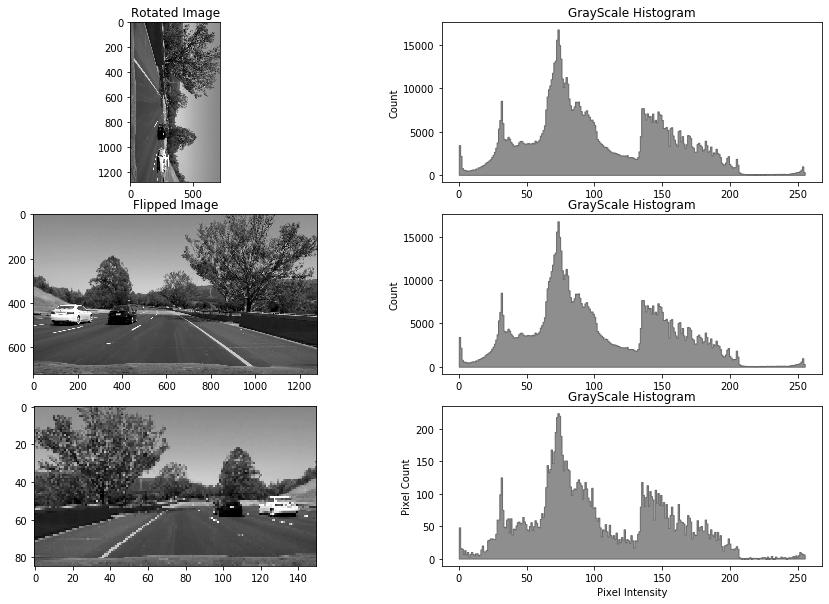

In [10]:
image_rotated = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
image_flipped = cv2.flip(image, 1)
image_resized = cv2.resize(image, (150,85))


f, ax = plt.subplots(3, 2, figsize=(15,10))

ax[0,0].set_title('Rotated Image')
ax[0,0].imshow(image_rotated, cmap="gray")
ax[0,1].set_title('GrayScale Histogram')
plotGrayDistribution(image_rotated, ax[0,1])
ax[1,0].set_title('Flipped Image')
ax[1,0].imshow(image_flipped, cmap="gray")
ax[1,1].set_title('GrayScale Histogram')
plotGrayDistribution(image_flipped, ax[1,1])
ax[2,0].imshow(image_resized, cmap="gray")
ax[2,1].set_title('GrayScale Histogram')
plotGrayDistribution(image_resized, ax[2,1])
plt.show()

##   

### Image Smoothing

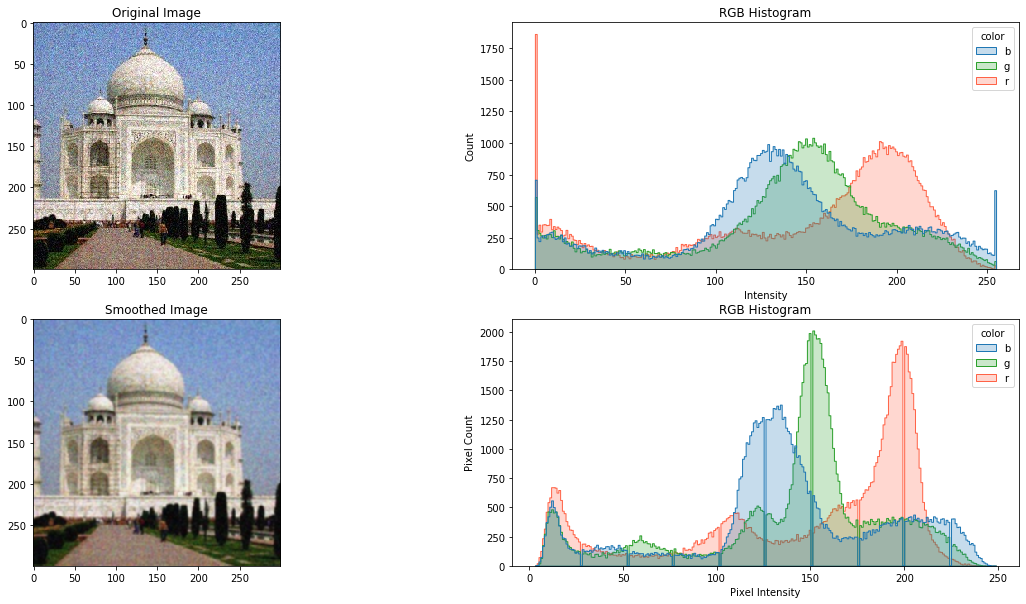

In [26]:
from ImageHistogram import plotRGBDistribution

image = cv2.imread("Image_Database/noisy.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

filtered_image = cv2.GaussianBlur(image,(5,5),0)

f, ax = plt.subplots(2, 2, figsize=(20,10))

ax[0,0].set_title('Original Image')
ax[0,0].imshow(image)
ax[0,1].set_title('RGB Histogram')
plotRGBDistribution(image, ax[0,1])
ax[1,0].set_title('Smoothed Image')
ax[1,0].imshow(filtered_image)
ax[1,1].set_title('RGB Histogram')
plotRGBDistribution(filtered_image, ax[1,1])
plt.show()

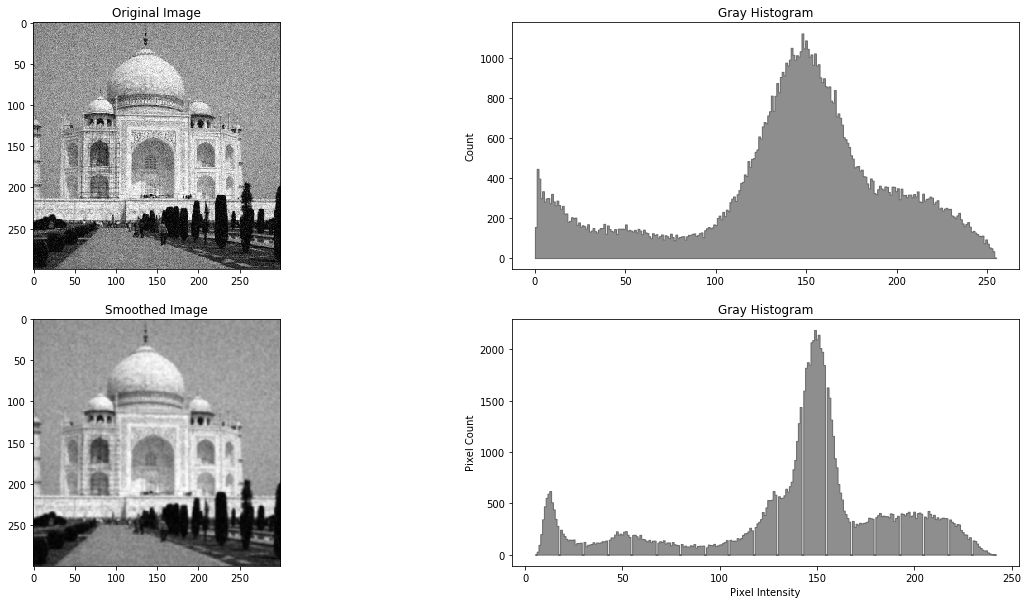

In [11]:
from ImageHistogram import plotRGBDistribution

image = cv2.imread("../Image_Database/noisy.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

filtered_image = cv2.GaussianBlur(image,(5,5),0)

f, ax = plt.subplots(2, 2, figsize=(20,10))

ax[0,0].set_title('Original Image')
ax[0,0].imshow(image, cmap="gray")
ax[0,1].set_title('Gray Histogram')
plotGrayDistribution(image, ax[0,1])
ax[1,0].set_title('Smoothed Image')
ax[1,0].imshow(filtered_image, cmap="gray")
ax[1,1].set_title('Gray Histogram')
plotGrayDistribution(filtered_image, ax[1,1])
plt.show()

##   

## 2-D Histograms

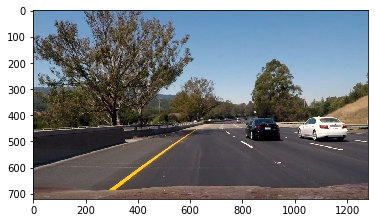

In [13]:
image = cv2.imread("../Image_Database/road.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

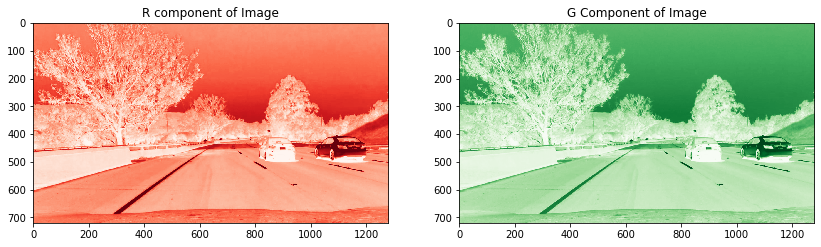

In [81]:
image = cv2.imread("../Image_Database/road.jpg")

b,g,r = cv2.split(image)

f,ax = plt.subplots(1, 2, figsize=(14,10))

ax[0].set_title('R component of Image')
ax[0].imshow(r,cmap="Reds")
ax[1].set_title('G Component of Image')
ax[1].imshow(g,cmap="Greens")
plt.show()

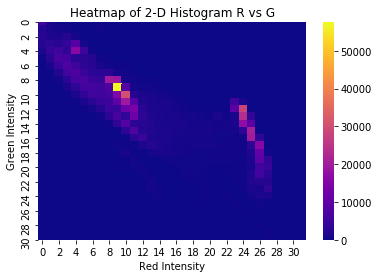

In [101]:
f,ax = plt.subplots()
hist = cv2.calcHist([r,b], [0, 1], None,[32, 32], [0, 256, 0, 256])
sns.heatmap(hist,cmap="plasma",ax=ax)
plt.title("Heatmap of 2-D Histogram R vs G")
ax.set(xlabel="Red Intensity", ylabel = "Green Intensity")
plt.show()

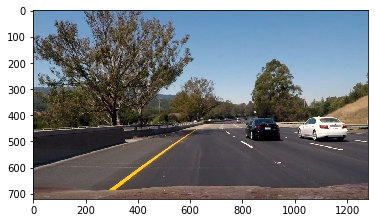

In [18]:
plt.imshow(image)

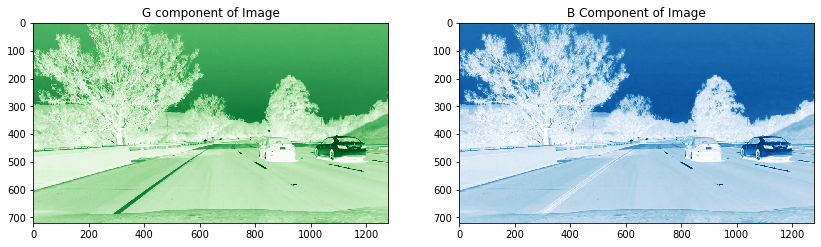

In [83]:
f,ax = plt.subplots(1, 2, figsize=(14,10))

ax[0].set_title('G component of Image')
ax[0].imshow(g,cmap="Greens")
ax[1].set_title('B Component of Image')
ax[1].imshow(b,cmap="Blues")
plt.show()

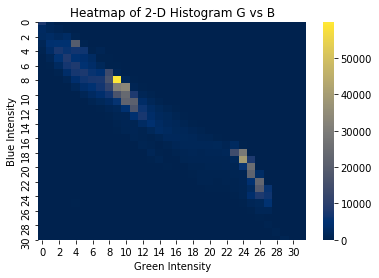

In [102]:
f,ax = plt.subplots()
hist = cv2.calcHist([g,b], [0, 1], None,[32, 32], [0, 256, 0, 256])
sns.heatmap(hist,cmap="cividis",ax=ax)
plt.title("Heatmap of 2-D Histogram G vs B")
ax.set(xlabel="Green Intensity", ylabel = "Blue Intensity")
plt.show()

###    

## 3-D Histograms

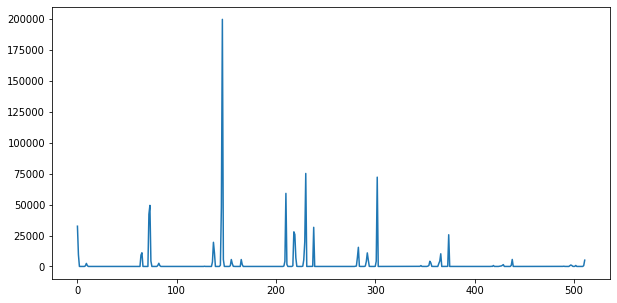

In [120]:
image = cv2.imread("../Image_Database/road.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

f, ax = plt.subplots(figsize=(10,5))
hist = cv2.calcHist([image], [0, 1, 2],None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
plt.title("Plot of Flattened RGB Histogram")
sns.lineplot(data=hist.ravel())
plt.show()

#     

## Feature Vector(Hu Mements) after Image Convolutions

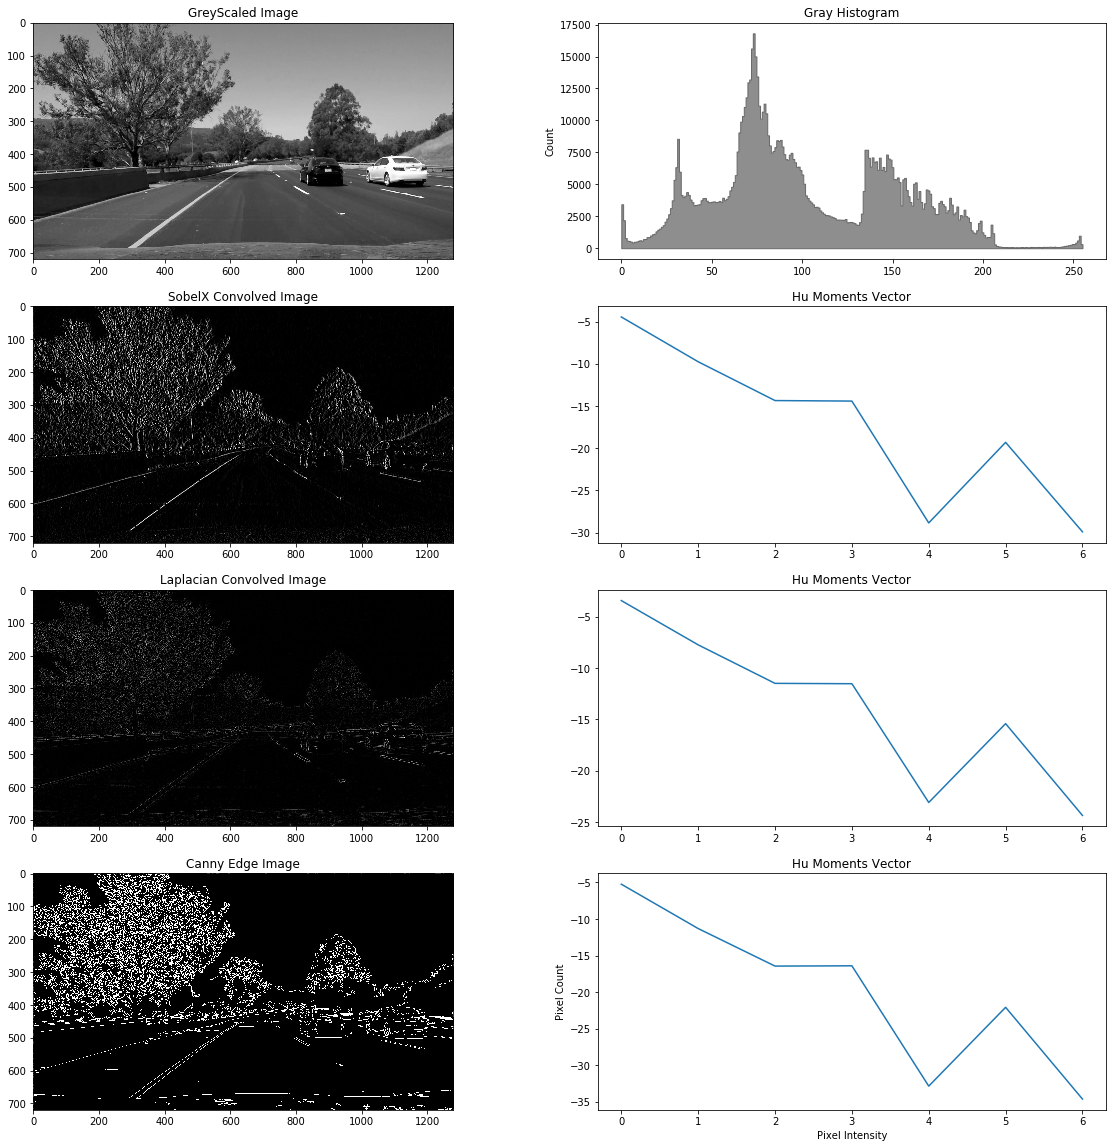

In [32]:
from ConvolutionalFilters import ConvolutionFilter
from ImageHistogram import plotGrayDistribution
from ImageHistogram import plotConvolveDistribution

image = cv2.imread("../Image_Database_old/road.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

filters = ConvolutionFilter(image)
filtered_image_sx = filters.applySobelX()
filtered_image_sy = filters.applySobelY()
filtered_image_laplacian = filters.applyLaplacian()
filtered_image_canny = filters.applyCannyEdge()

f, ax = plt.subplots(4, 2, figsize=(20,20))

ax[0,0].set_title('GreyScaled Image')
ax[0,0].imshow(filters.image, cmap="gray")
ax[0,1].set_title('Gray Histogram')
plotGrayDistribution(filters.image, ax[0,1])

ax[1,0].set_title('SobelX Convolved Image')
ax[1,0].imshow(filtered_image_sx, cmap="gray")
ax[1,1].set_title('Hu Moments Vector')
ax[1,1].plot([math.log(abs(v)) for v in cv2.HuMoments(cv2.moments(filtered_image_sx)).flatten()])

ax[2,0].set_title('Laplacian Convolved Image')
ax[2,0].imshow(filtered_image_laplacian, cmap="gray")
ax[2,1].set_title('Hu Moments Vector')
ax[2,1].plot([math.log(abs(v)) for v in cv2.HuMoments(cv2.moments(filtered_image_laplacian)).flatten()])

ax[3,0].set_title('Canny Edge Image')
ax[3,0].imshow(filtered_image_canny, cmap="gray")
ax[3,1].set_title('Hu Moments Vector')
ax[3,1].plot([math.log(abs(v)) for v in cv2.HuMoments(cv2.moments(filtered_image_canny)).flatten()])

plt.show()